## **Representation of qubit states using matrices**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

# Qubit state |0⟩ and |1⟩ in ket notation using matrices
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

# Display the states
print("Ket |0⟩:\n", ket_0)
print("Ket |1⟩:\n", ket_1)

Ket |0⟩:
 [[1]
 [0]]
Ket |1⟩:
 [[0]
 [1]]


In [3]:
# Qubit state |0⟩ and |1⟩ in bra notation using matrices
bra_0 = np.array([[1, 0]])
bra_1 = np.array([[0, 1]])

# Display the states
print("Bra |0⟩:\n", bra_0)
print("Bra |1⟩:\n", bra_1)

Bra |0⟩:
 [[1 0]]
Bra |1⟩:
 [[0 1]]


In [4]:
M1 = np.array([[1,1], [0,0]])
M2 = np.array([[1,1], [1,0]])

M1/2 +M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

## **State Vector Representation using Qiskit and check validity of representation**

In [5]:
from qiskit.quantum_info import Statevector
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

In [6]:
print("u: ")
display(u.draw("latex"))
print("v: ")
display(v.draw("latex"))
print("w: ")
display(w.draw("latex"))

u: 


<IPython.core.display.Latex object>

v: 


<IPython.core.display.Latex object>

w: 


<IPython.core.display.Latex object>

In [7]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [8]:
print("u: ")
u.measure()

u: 


(np.str_('0'),
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

 ## **Qsphere representation of a quantum state**
 Here, the size of the points is proportional to the probability of the corresponding term in the state and the color represents the phase.

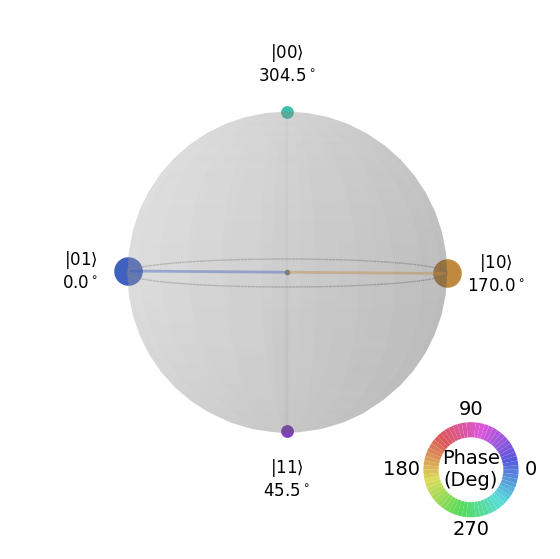

In [11]:
# We can show the phase of each state and use
 
from qiskit.quantum_info import DensityMatrix
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
 
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
qc.z(1)
 
matrix = DensityMatrix(qc)
plot_state_qsphere(matrix,
     show_state_phases = True, use_degrees = True)

## **Create a custom qubit state |ψ⟩ = α|0⟩ + β|1⟩**

In [44]:
def custom_qubit(alpha, beta):
    # Normalize the state vector
    norm = np.sqrt(abs(alpha)**2 + abs(beta)**2)
    alpha, beta = alpha / norm, beta / norm
    return np.array([[alpha], [beta]])

In [14]:
# Define a custom state and display
alpha, beta = 1+0j, 1j  # Example superposition
state_psi = custom_qubit(alpha, beta)
print("Custom Qubit State |ψ⟩:\n", state_psi)

Custom Qubit State |ψ⟩:
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]]


In [18]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

In [19]:
# Function to convert state vector to a readable matrix format
def state_vector_to_matrix(state_vector):
    return np.array(state_vector).reshape(-1, 1)

## **Bloch Sphere Representation of Qubits**

On the Bloch sphere, any pure qubit state can be represented as a point on the surface of the sphere using spherical coordinates:

- **Latitude (𝜃)**: The polar angle from the positive z-axis (ranges from \(0\) to \(\pi\)).
- **Longitude (𝜙)**: The azimuthal angle around the z-axis (ranges from \(0\) to \(2\pi\)).

Using these angles, the qubit state can be expressed in terms of the Bloch sphere as:

$$|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle$$


### Axes of the Bloch Sphere:
- **Z-axis**: Represents the basis states $|0\rangle$  (north pole) and $|1\rangle$  (south pole).
- **X-axis**: Represents the superpositions $|+\rangle$ (point along the positive x-axis) and $|-\rangle$ (point along the negative x-axis).
- **Y-axis**: Represents the states $|i\rangle$ (point along the positive y-axis) and $|-i\rangle$ (point along the negative y-axis).

### Mixed States:
Mixed states, which are statistical mixtures of pure states, can be represented as points inside the Bloch sphere. The center of the sphere represents a completely mixed state (maximum uncertainty).


In [35]:
qc = QuantumCircuit(2)

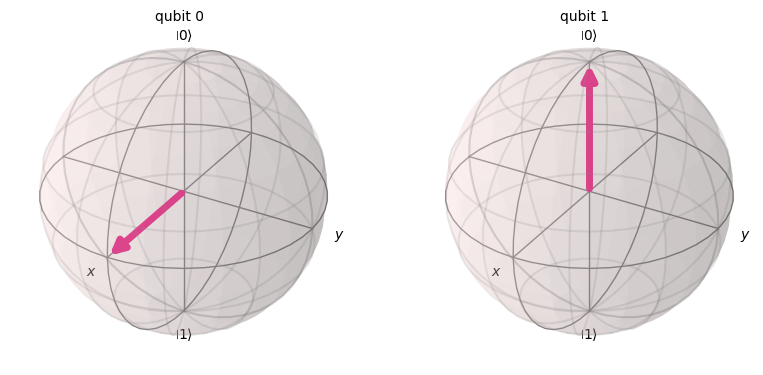

In [36]:
qc.h(0) 
state = Statevector(qc)
plot_bloch_multivector(state)


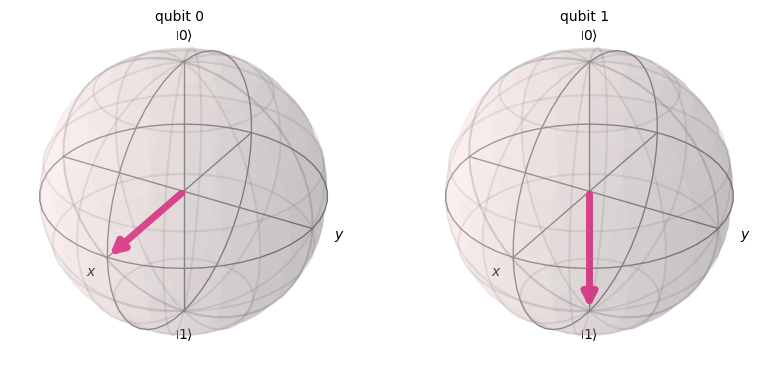

In [38]:
qc.x(1) 
state = Statevector(qc)
plot_bloch_multivector(state)


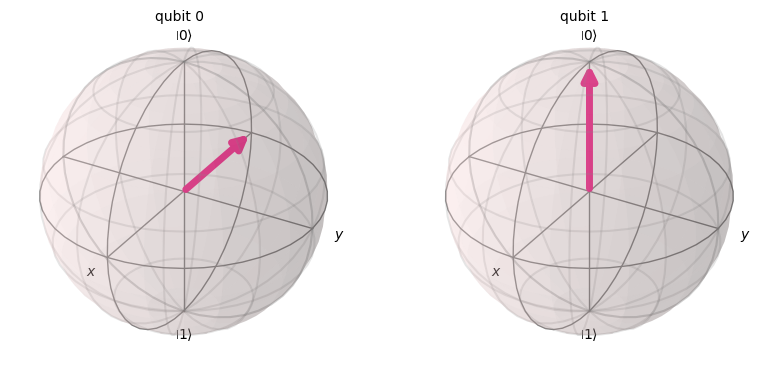

In [40]:
qc.y(0)
state = Statevector(qc)
plot_bloch_multivector(state)

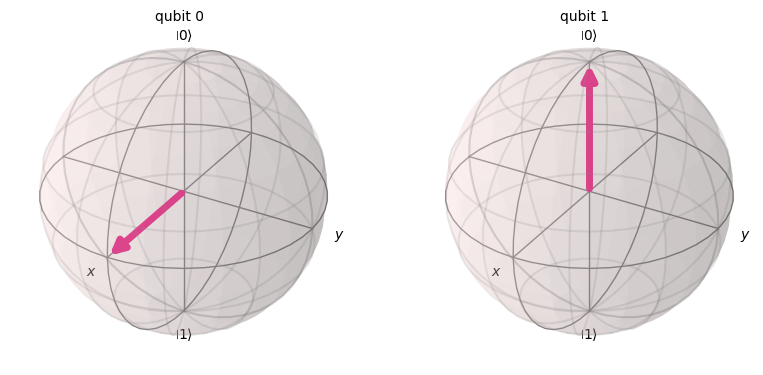

In [42]:
qc.z(1)
state = Statevector(qc)
plot_bloch_multivector(state)

## **Quantum State Representation**

A quantum state can be represented as a vector in a complex Hilbert space. For a single qubit, the state can be expressed as a linear combination of its basis states \( |0\rangle \) and \( |1\rangle \):

$$
v = \alpha |0\rangle + \beta |1\rangle
$$

where 

$$
|\alpha|^2 + |\beta|^2 = 1.
$$

# Measurement

When we measure a quantum state, the result will collapse the state to one of the basis states (in this case, \( |0\rangle \) or \( |1\rangle \)). The probability of measuring each state is determined by the coefficients in the state vector. For instance, if the state vector is such that:

$$
v = \frac{5}{3}|0\rangle + \frac{2}{3}|1\rangle,
$$

the probabilities would be:

$$
P(0) = |\alpha|^2 = \left(\frac{5}{3}\right)^2 = \frac{5}{9} \quad \text{(about 556 out of 1000)}
$$

$$
P(1) = |\beta|^2 = \left(\frac{2}{3}\right)^2 = \frac{4}{9} \quad \text{(about 444 out of 1000)}.
$$

# Simulation of Measurements

By simulating measurements multiple times (like 1000 trials), we can estimate the probabilities of getting each outcome based on the state vector. Due to the probabilistic nature of quantum mechanics, running the experiment multiple times can yield slightly different results, but the distribution should converge towards the theoretical probabilities as the number of trials increases.

# Histogram Visualization

We can use a histogram to visualize the results of these measurements. The x-axis denotes the two states, 0 and 1 and the y-ais denotes the count of measurement.


{np.str_('0'): np.int64(543), np.str_('1'): np.int64(457)}

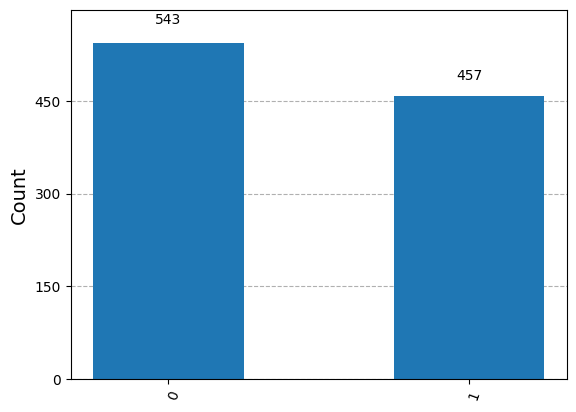

In [43]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)